# Analiza podatkov o viskijih

V tej datoteki bom s knjižnico pandas analiziral podatke o viskijih

### Naložimo pandas in podatke

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 30

%matplotlib inline


viski = pd.read_csv("viski.csv")

Poglejmo si nekaj podatkov

In [48]:
viski

,ocena,ime,alkohol,kategorija,cena,opis,ocenjevalec,cas_ocene
0,60,Woodford Reserve Master’s Collection Five Malt,45.20,American Blended Whiskey,50.0,"Four barley types—two row, pale chocolate, kiln coffee, and Carafa—and malted wheat; aged 6 mont...",Fred Minnick,Fall 2016
1,60,Cavalry,45.00,Bourbon/Tennessee,30.0,"Although it’s not on the label, Cavalry uses the TerrePURE technology on 4 month old MGP whiskey...",Fred Minnick,Spring 2016
2,63,"Distillery Select 'Inchmoan' (distilled at Loch Lomond), Cask #151",NaN,Single Malt Scotch,60.0,"Fiery peat kiln smoke, tar, and ripe barley on the nose. Not overly complex, but not a problem e...",John Hansell,Fall 2007
3,65,Chinook Limited Edition Signature Rye Whisky,44.90,Canadian,17.0,"With its overt floral perfume notes and the scent of children’s powdered candy, this whisky is d...",Davin de Kergommeaux,Winter 2015
4,65,Iowa Legendary Rye,40.00,Craft Whiskey,35.0,"An unaged whiskey from Carroll County, Iowa, with rye grain and sugar mash. The nose is all kind...",Geoffrey Kleinman,Summer 2015
5,67,American Born Dixie Sweet Tea Moonshine,41.50,Flavored Whisky & Liqueurs,22.0,"This flavored moonshine smells like a mass of wet, used tea bags. Underneath is some faint lemon...",Geoffrey Kleinman,Fall 2014
6,67,Southern Comfort Fiery Pepper,35.00,Flavored Whisky & Liqueurs,17.0,Does a nose of bright bubble gum and fresh-cut peppers touched by the fermented heat of Tabasco ...,Lew Bryson,Spring 2012
7,68,Freedom Moonshine Apple Pie Rye,20.00,Flavored Whisky & Liqueurs,20.0,The aromas from the base rye moonshine complement the apple much better here than in Freedom’s o...,Geoffrey Kleinman,Winter 2014
8,68,Southern Shine Blueberry Moonshine,50.00,Flavored Whisky & Liqueurs,16.0,All of the elements that work with Southern Shine’s Apple Pie bottling don’t work with their Blu...,Geoffrey Kleinman,Fall 2014
9,69,Cabin Fever,40.00,Flavored Whisky & Liqueurs,21.0,"Real maple syrup has an earthy, woodsy aroma; maple flavoring has strong overtones of coconut, a...",Davin de Kergommeaux,Summer 2014


### Analiza
Najprej si poglejmo razpored po kategorijah

In [49]:
viski_kategorije = viski.groupby("kategorija")

In [117]:
viski_kategorije["ime"].count().sort_values(ascending=False)

kategorija
Single Malt Scotch                  1971
Bourbon/Tennessee                    652
Craft Whiskey                        385
Blended Scotch Whisky                257
Canadian                             256
Rye Whiskey                          177
Blended Malt Scotch Whisky           171
Japanese                             101
Irish                                 98
Flavored Whisky & Liqueurs            62
Single Grain Whisky                   61
Irish Single Malt                     59
Irish Blended Whiskey                 48
American Whiskey (Unspecified)        43
Australian Whisky                     42
                                    ... 
South African Whisky                   4
Blended French Whisky                  3
Straight Malt                          3
Blended Grain Scotch Whisky            2
Italian                                2
English Grain Spirit                   2
Straight Corn Whiskey                  2
Single Malt Belgian Whisky             2
Engli

In [116]:
viski_kategorije.mean().sort_values(by='cena', ascending=False)

,ocena,alkohol,cena
kategorija,,,
Blended Scotch Whisky,87.603113,42.685654,882.469880
Single Malt Scotch,86.895485,48.325676,548.488301
Grain Scotch Whisky,86.555556,50.154545,278.259259
Danish,84.250000,51.187500,248.875000
Miscellaneous,85.750000,49.280000,222.437500
Irish Single Malt,89.983051,44.284746,220.338983
Single Grain Whisky,85.524590,50.465574,213.049180
Taiwanese Whisky,90.115385,52.250000,201.230769
Single Malt American Whiskey,85.687500,47.950000,200.250000


In [53]:
viski_ocene = viski.groupby("ocena").size()
viski_ocene

ocena
60      2
63      1
65      2
67      2
68      2
69      2
70      7
71      5
72     12
73     13
74     11
75     18
76     22
77     46
78     54
     ... 
83    236
84    336
85    379
86    388
87    454
88    459
89    393
90    449
91    279
92    285
93    208
94    111
95     72
96     45
97      4
Length: 34, dtype: int64

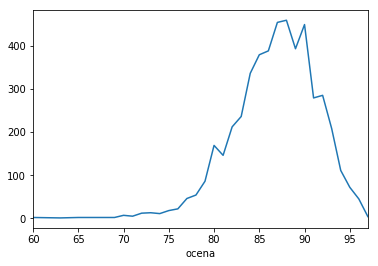

In [54]:
viski_ocene.plot()

Iz grafa in tabele vidimo, da se večina ocen giblje med 80 in 97 točkami. 
V tem območju dobimo skoraj pričakovano normalno porazdelitev, zanimiv je morda le padec pri 89.
Verjetno gre to pripisati subjektivni naravi ocenjevanja hrane. Tudi ocena 89 je nehvaležna, ker je tik pod "desetko" (kot na fakulteti).

In [55]:
viski_cas = viski.groupby("cas_ocene")

In [86]:
viski['leto'] = viski.cas_ocene.replace(to_replace="Fall|Spring|Winter|Summer", value="",inplace=False, limit=None, regex=True, method='pad')


In [87]:
viski


,ocena,ime,alkohol,kategorija,cena,opis,ocenjevalec,cas_ocene,leto
0,60,Woodford Reserve Master’s Collection Five Malt,45.20,American Blended Whiskey,50.0,"Four barley types—two row, pale chocolate, kiln coffee, and Carafa—and malted wheat; aged 6 mont...",Fred Minnick,Fall 2016,2016
1,60,Cavalry,45.00,Bourbon/Tennessee,30.0,"Although it’s not on the label, Cavalry uses the TerrePURE technology on 4 month old MGP whiskey...",Fred Minnick,Spring 2016,2016
2,63,"Distillery Select 'Inchmoan' (distilled at Loch Lomond), Cask #151",NaN,Single Malt Scotch,60.0,"Fiery peat kiln smoke, tar, and ripe barley on the nose. Not overly complex, but not a problem e...",John Hansell,Fall 2007,2007
3,65,Chinook Limited Edition Signature Rye Whisky,44.90,Canadian,17.0,"With its overt floral perfume notes and the scent of children’s powdered candy, this whisky is d...",Davin de Kergommeaux,Winter 2015,2015
4,65,Iowa Legendary Rye,40.00,Craft Whiskey,35.0,"An unaged whiskey from Carroll County, Iowa, with rye grain and sugar mash. The nose is all kind...",Geoffrey Kleinman,Summer 2015,2015
5,67,American Born Dixie Sweet Tea Moonshine,41.50,Flavored Whisky & Liqueurs,22.0,"This flavored moonshine smells like a mass of wet, used tea bags. Underneath is some faint lemon...",Geoffrey Kleinman,Fall 2014,2014
6,67,Southern Comfort Fiery Pepper,35.00,Flavored Whisky & Liqueurs,17.0,Does a nose of bright bubble gum and fresh-cut peppers touched by the fermented heat of Tabasco ...,Lew Bryson,Spring 2012,2012
7,68,Freedom Moonshine Apple Pie Rye,20.00,Flavored Whisky & Liqueurs,20.0,The aromas from the base rye moonshine complement the apple much better here than in Freedom’s o...,Geoffrey Kleinman,Winter 2014,2014
8,68,Southern Shine Blueberry Moonshine,50.00,Flavored Whisky & Liqueurs,16.0,All of the elements that work with Southern Shine’s Apple Pie bottling don’t work with their Blu...,Geoffrey Kleinman,Fall 2014,2014
9,69,Cabin Fever,40.00,Flavored Whisky & Liqueurs,21.0,"Real maple syrup has an earthy, woodsy aroma; maple flavoring has strong overtones of coconut, a...",Davin de Kergommeaux,Summer 2014,2014


In [89]:
viski_leto = viski.groupby("leto")

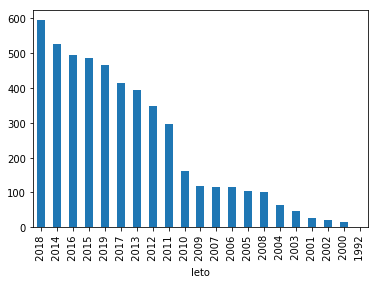

In [93]:
viski_leto.size().sort_values(ascending=False).plot.bar(y='stevilo reviewov')

Vidimo, da je stran Whiskey advocate izrazito bolj aktivna od leta 2010 naprej. Mogoče ta stran sploh se ni obstajala pred letom 2010, in so ocene naknadno prepisali iz revije, ki so jo izdajali ze prej, vendar je to zgolj ugibanje. Tudi na internetu nisem zasledil podatkov o času delovanja spletne strani, ali revije.
Možno pa je tudi, da je povpraševanje to taki obliki ocenjevanja viskija v zadnjih petih letih močno naraslo.

In [129]:
viski.sort_values(by='cena', ascending=False)

,ocena,ime,alkohol,kategorija,cena,opis,ocenjevalec,cas_ocene,leto
4615,93,Diamond Jubilee by John Walker & Sons,42.5,Blended Scotch Whisky,157000.0,"Bright gold. Amazingly fresh fruits and quince, slowly evolving into mango, blueberry, and a jam...",Dave Broom,Summer 2012,2012
4547,93,The Dalmore 50 year old,40.0,Single Malt Scotch,60000.0,"This veteran Dalmore was matured successively in bourbon casks, Matusalem <i>oloroso</i> sherry ...",Gavin Smith,Winter 2017,2017
4701,94,Bowmore 50 year old 1966 vintage,41.5,Single Malt Scotch,30000.0,The third and most exclusive release in Bowmore’s Vault Legends Collection was matured for 50 ye...,Gavin Smith,Summer 2018,2018
4687,94,Balvenie 1971 vintage,49.9,Single Malt Scotch,27747.0,"This veteran was matured in a European oak oloroso sherry butt. The nose is fragrant, with malt,...",Gavin Smith,Spring 2019,2019
3679,90,The Balvenie DCS Compendium 1st Chapter 1968 46 year old (Cask# 7293),45.9,Single Malt Scotch,27620.0,The oldest of the set shows a shift into a sense of calm and quietude. The dried blossoms of you...,Dave Broom,Spring 2016,2016
4817,95,Bowmore 50 year old (distilled 1961),40.7,Single Malt Scotch,26650.0,"The whisky is sensational, a glorious mix of ginseng syrup, baked banana, semi-dried tropical fr...",Dave Broom,Spring 2014,2014
3468,90,"Gordon & MacPhail Private Collection 1948 (distilled at Glen Grant, Cask 2154)",48.6,Single Malt Scotch,25000.0,"Smoky sherry, damp burlap, lanolin, then orange blossom on the nose, with a hint of glass cleane...",Gavin Smith,Fall 2019,2019
4128,91,The Dalmore 1969 42 year old,45.5,Single Malt Scotch,24000.0,"Initially filled into an ex-bourbon cask, then transferred into a Gonzales Byass oloroso ‘Matusa...",Gavin Smith,Fall 2012,2012
4086,91,Tullibardine 1952,40.2,Single Malt Scotch,23427.0,"This bottling is from the oldest cask owned by Tullibardine distillery, a sherry quarter cask (#...",Gavin Smith,Summer 2015,2015
3823,90,Gordon & MacPhail Generations: Glenlivet 70 year old,45.9,Single Malt Scotch,21000.0,"You would expect any 70 year old whisky to be crepuscular, dense, and wooded. Not here. The nose...",Dave Broom,Summer 2011,2011


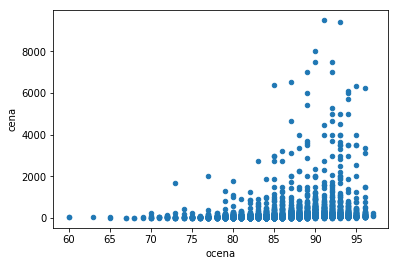

In [142]:
viski[viski['cena'] < 10000].plot.scatter('ocena', 'cena')

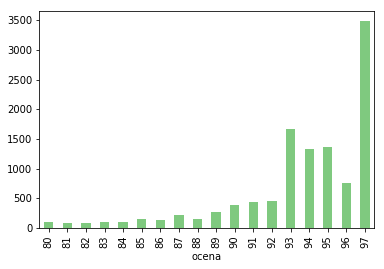

In [141]:
viski_ocene = viski[viski['ocena'] > 79].groupby('ocena')
viski_ocene['cena'].mean().plot.bar(colormap='Accent')

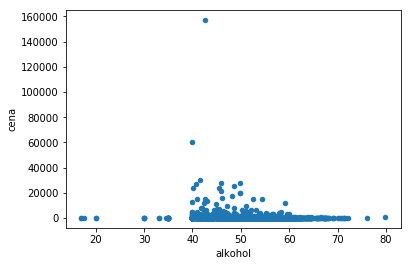

In [118]:
viski.plot.scatter('alkohol', 'cena')

Poglejmo še viskije cenejše od 1000$, da bo graf bolj pregleden

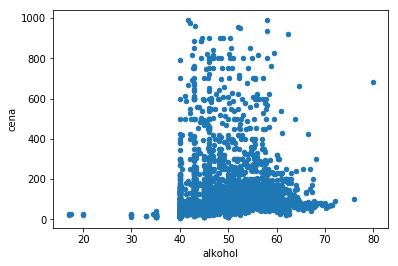

In [119]:
viski[viski['cena'] < 1000].plot.scatter('alkohol', 'cena')

Vidimo, da odvisnosti med ceno in vsebnostjo alkohola ni, večina viskijev pa se nahaja v območju med  40%- 60% alkohola.
Izgleda pa, da je meja 40% zelo stroga, vsebnost alkohola pod 60% pa zgolj priporočilo.

Pa si poglejmo viskije z manj kot 40% alkohola.

In [120]:
viski[viski['alkohol'] < 40]

,ocena,ime,alkohol,kategorija,cena,opis,ocenjevalec,cas_ocene,leto
6,67,Southern Comfort Fiery Pepper,35.0,Flavored Whisky & Liqueurs,17.0,Does a nose of bright bubble gum and fresh-cut peppers touched by the fermented heat of Tabasco ...,Lew Bryson,Spring 2012,2012
7,68,Freedom Moonshine Apple Pie Rye,20.0,Flavored Whisky & Liqueurs,20.0,The aromas from the base rye moonshine complement the apple much better here than in Freedom’s o...,Geoffrey Kleinman,Winter 2014,2014
15,70,Fireball Cinnamon Whisky,33.0,Canadian,16.0,It does say “whisky” on the label...followed by “with natural cinnamon flavor.” It's clear from ...,Lew Bryson,Winter 2011,2011
20,71,Black Velvet Cinnamon Rush,35.0,Flavored Whisky & Liqueurs,15.0,"One of the most popular flavored whiskies today is Fireball cinnamon, so it’s no surprise that o...",Davin de Kergommeaux,Summer 2014,2014
38,73,Catch Fire Cinnamon,30.0,Flavored Whisky & Liqueurs,12.0,"Cinnamon is reputed to have medicinal qualities, but you can bet those who drink Catch Fire Cinn...",Davin de Kergommeaux,Fall 2014,2014
39,73,Spicebox Pumpkin Spiced Whisky,35.0,Flavored Whisky & Liqueurs,20.0,"Early trial batches of this whisky, flavored by cold infusion, tasted like sweet, roasted squash...",Davin de Kergommeaux,Summer 2014,2014
40,73,Spicebox Cinnamon Whisky Lot 1642,33.0,Flavored Whisky & Liqueurs,17.0,Cinnamon hearts. Very sweet and crazy hot with cinnamon. The cinnamon so dominates this liqueur-...,Davin de Kergommeaux,Spring 2014,2014
89,76,Cinnamon Mist,35.0,Flavored Whisky & Liqueurs,10.0,"It certainly is cinnamon: got a nose full of it, and not Red Hots, either, this is real cinnamon...",Lew Bryson,Spring 2014,2014
90,76,Maple Mist,35.0,Flavored Whisky & Liqueurs,10.0,"Warm maple, caramel, and salt in the nose, like caramels being melted for making cookies (someth...",Lew Bryson,Spring 2014,2014
91,76,Southern Comfort Bold Black Cherry,35.0,Flavored Whisky & Liqueurs,17.0,"A medicinal cherry smell, like cough syrup and cherry PEZ, edged with a nutty hint of almonds. M...",Lew Bryson,Fall 2012,2012


Vidimo da so viskiji z manj kot 40% alkohola skoraj vsi clani posebne kategorije, torej niso čisto "pravi" viskiji.
Izjema pa je Fireball Cinnamon Whisky. Vidimo da nima ravno visoke ocene, poglejmo si še, kaj je o njem napisal ocenjevalec.

In [121]:
pd.set_option('display.max_colwidth', -1)
viski[viski['ime'] == "Fireball Cinnamon Whisky"]['opis']

15    It does say “whisky” on the label...followed by “with natural cinnamon flavor.” It's clear from the first sniff that this is a one-trick pony: hot, fiery cinnamon. But is there whisky flavor in there? Fireball's as sweet as the liqueur proof would indicate, and as hot as advertised, and there's only a hint of whisky character under the fire. A novelty for tailgating; probably great in hot chocolate. 
Name: opis, dtype: object

Iz opisa je razvidno da tudi ta spada v kategorijo Flavored Whisky, torej gre le za napačno kategoriziranje.

Popraviti moramo še opcijo prikaza.

In [122]:
pd.set_option('display.max_colwidth', 100)

In [127]:
viski_ocenjevalec = viski.groupby("ocenjevalec")
viski_ocenjevalec['ocenjevalec'].count().sort_values(ascending=False)

ocenjevalec
John Hansell              1117
Jonny McCormick            847
Gavin Smith                824
Dave Broom                 508
Lew Bryson                 372
Dominic Roskrow            242
Davin de Kergommeaux       231
Fred Minnick               189
Susannah Skiver Barton     187
Jeffery Lindenmuth         186
Geoffrey Kleinman           93
David Fleming               92
Adam Polonski               22
Name: ocenjevalec, dtype: int64

In [126]:
viski_ocenjevalec.mean().sort_values(by='ocena', ascending=False)

,ocena,alkohol,cena
ocenjevalec,,,
David Fleming,88.293478,49.276703,92.619565
Adam Polonski,88.136364,49.568182,66.809524
Jonny McCormick,87.795750,45.797630,182.110979
Gavin Smith,87.514563,47.541830,678.621490
Susannah Skiver Barton,87.427807,47.052174,58.955056
John Hansell,87.295434,48.260887,252.545699
Jeffery Lindenmuth,87.112903,48.629670,81.527473
Fred Minnick,86.835979,50.536346,107.611702
Dominic Roskrow,86.181818,47.372414,108.421488
